# Plots

In [1]:
# Plots
from lib.plots import (
    plot_random_variable_distribution,
    plot_random_variable_distribution_function,
    plot_random_variable_constant_distribution_function,
)

In [2]:
example_random_variable_distribution = {0: 1 / 3, 1.2: 1 / 2, 2.5: 0, 3: 1 / 6}

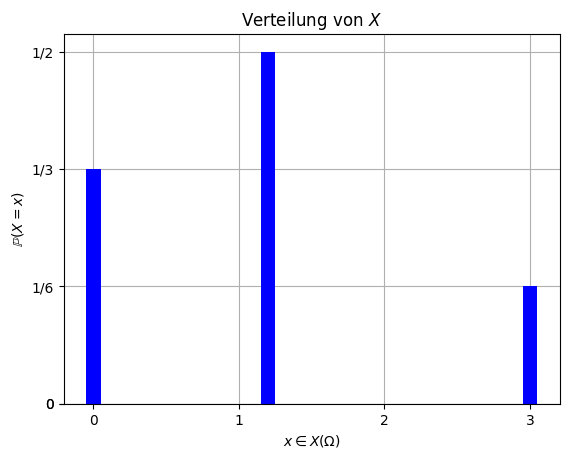

,$x \in X(\Omega)$,$\mathbb{P}(X = x)$
0,0.0,0.333333
1,1.2,0.500000
2,2.5,0.000000
3,3.0,0.166667


In [3]:
plot_random_variable_distribution(
    example_random_variable_distribution,
    draw_only_data_y_ticks=True,
    fraction_y_ticks=True,
)

## Distribution function plot (Verteilungsfunktion)

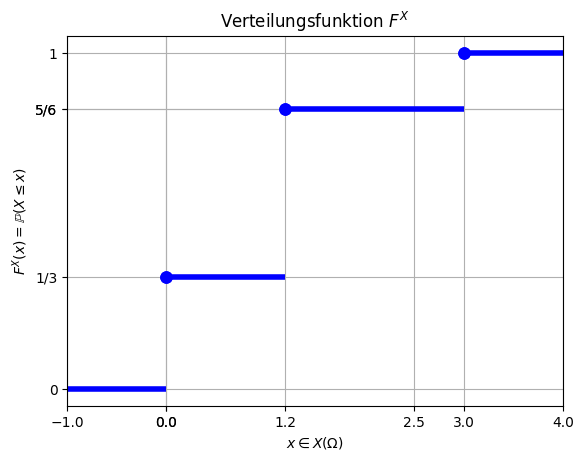

,$x \in X(\Omega)$,$\mathbb{P}(X = x)$,$F^X(x) = \mathbb{P}(X \leq x)$
0,0.0,0.333333,0.333333
1,1.2,0.500000,0.833333
2,2.5,0.000000,0.833333
3,3.0,0.166667,1.000000


In [4]:
plot_random_variable_distribution_function(
    example_random_variable_distribution,
    draw_only_data_x_ticks=True,
    draw_only_data_y_ticks=True,
    fraction_y_ticks=True,
)

## Distribution function constant plot (Konstante Verteilungsfunktion)

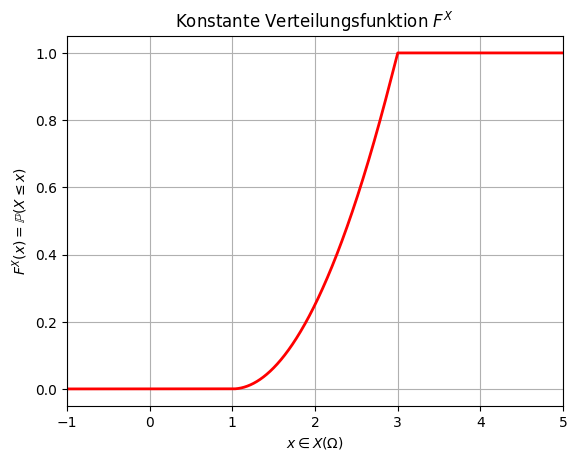

In [5]:
plot_random_variable_constant_distribution_function(
    lambda x_i: 0
    if x_i < 1
    else (1 if x_i > 3 else (x_i**2) / 4 - (x_i / 2) + (1 / 4)),
    (0, 4),
)

## Other plots (that don't yet have a dedicated method)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

randomGen = random.Random("seed")

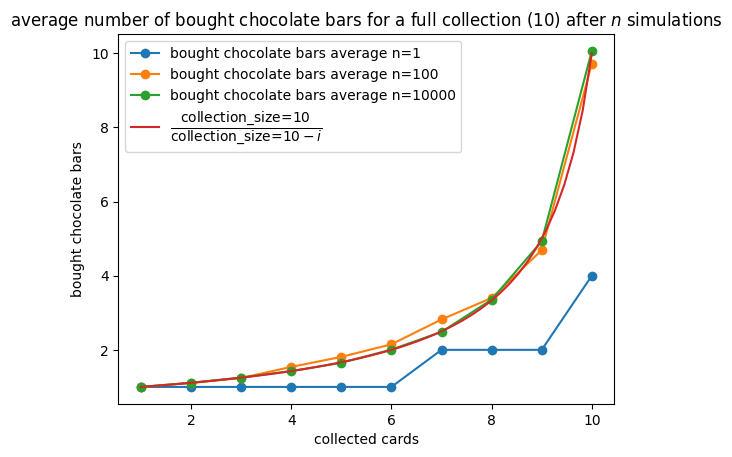

In [7]:
# Create data
def simulate_collecting_cards(collection_size: int) -> dict[int, int]:
    """Simulate collecting cards and return how many chocolate bars were bought.

    :param collection_size: The number of cards for a complete collection.
    :returns: How many chocolate bars were bought for each step of the collection.
    """
    collected_cards: set[int] = set()
    collected_cards_dict: dict[int, int] = dict()
    chocolate_bars_bought = 0
    while len(collected_cards) < collection_size:
        chocolate_bars_bought += 1
        current_card = randomGen.randint(1, collection_size)
        if not current_card in collected_cards:
            collected_cards.add(current_card)
            collected_cards_dict[len(collected_cards)] = chocolate_bars_bought
            chocolate_bars_bought = 0
    return collected_cards_dict


def average(lst: list[int]):
    return sum(lst) / len(lst)


def simulate_collecting_cards_n_average(
    collection_size: int, n_list: list[int]
) -> pd.DataFrame:
    """Simulate collecting cards multiple times and return how many chocolate bars were bought on average.

    :param collection_size: The number of cards for a complete collection.
    :param n_list: A list of the number of times the simulation should run.
    :returns: Table of simulation result: How many chocolate bars were bought for each step of the collection on average.
    """
    final_data = {"collected cards": range(1, collection_size + 1)}
    for n in n_list:
        collected_cards_list_dict = dict()
        for _ in range(n):
            result_dict = simulate_collecting_cards(collection_size)
            for key, value in result_dict.items():
                if not key in collected_cards_list_dict:
                    collected_cards_list_dict[key] = []
                collected_cards_list_dict[key].append(value)
        collected_cards_average_dict = dict()
        for key, value in collected_cards_list_dict.items():
            collected_cards_average_dict[key] = sum(value) / len(value)
        final_data[f"bought chocolate bars average {n=}"] = list(
            collected_cards_average_dict.values()
        )
    return pd.DataFrame(data=final_data)


collection_size = 10
data = simulate_collecting_cards_n_average(
    collection_size=collection_size, n_list=[1, 100, 10000]
)
# Plot data
plt.figure()
plt.title(
    f"average number of bought chocolate bars for a full collection ({collection_size}) after $n$ simulations"
)
for data_name in list(data.columns):
    if data_name != "collected cards" and data_name != "perfect curve":
        plt.plot(data["collected cards"], data[data_name], label=data_name, marker="o")
# Plot perfect curve with function 10/(10 - x)
x = np.linspace(min(data["collected cards"]), max(data["collected cards"]))
plt.plot(
    x,
    10 / (10 - x + 1),
    label=f"$\\dfrac{{\\text{{{collection_size=}}}}}{{\\text{{{collection_size=}}} - i}}$",
)
plt.legend()
plt.ylabel("bought chocolate bars")
plt.xlabel("collected cards")
plt.show()

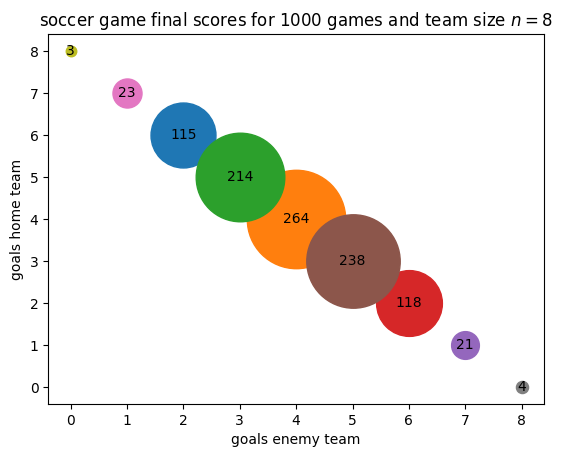

In [8]:
# Create data
def simulate_soccer_game(shot_goals: int) -> tuple[int, int]:
    """Simulate a soccer games where the probability to shoot a goal is the same
       for both parties. Return the number of goals of the home team after the
       given amount of goals were shot.

    :param shot_goals: The number of goals that are shot until the game is over.
    :returns: How many goals were shot by the home team.
    """
    goals_home_team = 0
    goals_enemy_team = 0
    while goals_home_team + goals_enemy_team < shot_goals:
        if randomGen.getrandbits(1) == 0:
            goals_home_team += 1
        else:
            goals_enemy_team += 1
    return goals_home_team, goals_enemy_team


game_count = 1000
team_size = 8
data = [simulate_soccer_game(team_size) for _ in range(game_count)]
data_sum: dict[tuple[int, int], int] = {}
max_count = 1
for data_point in data:
    if data_point in data_sum:
        if data_sum[data_point] > max_count:
            max_count = data_sum[data_point]
        data_sum[data_point] += 1
    else:
        data_sum[data_point] = 1
# Plot data
plt.figure()
plt.title(
    f"soccer game final scores for ${game_count}$ games and team size $n={team_size}$"
)
max_size = 5000
for (goals_home, goals_enemy), count in data_sum.items():
    plt.scatter(goals_home, goals_enemy, s=count / max_count * max_size)
    plt.annotate(f"{count}", (goals_home, goals_enemy), ha="center", va="center")
plt.ylabel("goals home team")
plt.xlabel("goals enemy team")
plt.xticks(range(0, team_size + 1))
plt.yticks(range(0, team_size + 1))
plt.show()